### Step 1: Import the required modules

In [1]:
import sklearn
import pandas as pd   # data loading & manipulation
import numpy as np  # numerical operations
from sklearn.model_selection import train_test_split  # split data 
from sklearn.linear_model import LogisticRegression # logistic model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2A: Prepare the datset

In [2]:
df = pd.read_csv("Churn._data.csv")

In [3]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


#### Step 2Ai: Add "Customer ID" Column as a unique identifier

In [4]:
df["Customer_ID"] = range(1, len(df) + 1)

In [5]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,Customer_ID
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0,1
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0,2
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0,3
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0,4
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
 11  Customer_ID               3941 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 369.6+ KB


#### Find the number of unique values in "Churn" column

In [7]:
df["Churn"].nunique()

2

### Display count of unique values in Churn column

In [8]:
df["Churn"].value_counts()

Churn
0    3267
1     674
Name: count, dtype: int64

#### Trim the spaces in the column headers of the table

In [9]:
df.columns = df.columns.str.strip()

#### Confirm te spaces have been trimmed

In [10]:
df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn', 'Customer_ID'],
      dtype='object')

#### Check for nulls in the dataset

In [11]:
df.isnull().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
Customer_ID                   0
dtype: int64

#### Replace nulls with specific values per column

In [12]:
df["Tenure"] = df["Tenure"].fillna(0)
df["WarehouseToHome"] = df["WarehouseToHome"].fillna(0)
df["DaySinceLastOrder"] = df["DaySinceLastOrder"].fillna(0)

### Step 2B: Define the target variable

In [13]:
y = df["Churn"] 
# Logistic regression predicts probability of churn and Churn must be binary (0/1), this is perfect for logistic regression. 

### Step 2C: Define the feature matrix(X) 

In [14]:
X = df[
    [ 
        "Tenure", 
"WarehouseToHome", 
    "SatisfactionScore", 
    "NumberOfAddress",
    "Complain",
        "DaySinceLastOrder"
    
]
]

### Step 3: Visualize the data (before modeling)

#### Customer tenure by Churn

In [15]:
# Create a folder "figures" to save chart
import os 
os.makedirs("figures", exist_ok=True)

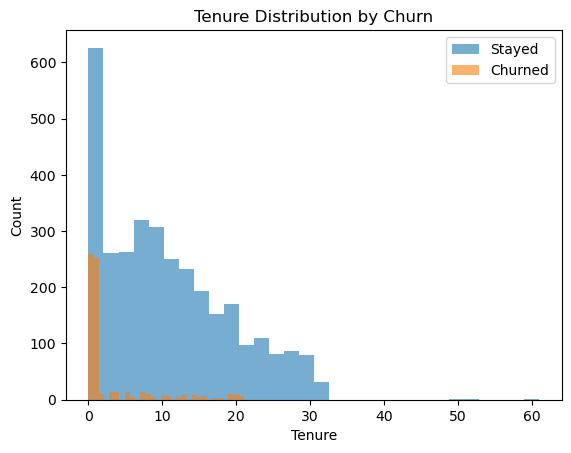

In [16]:
import matplotlib.pyplot as plt 

plt.hist(df[df["Churn"] == 0]
["Tenure"], bins = 30, alpha = 0.6, label = "Stayed")
plt.hist(df[df["Churn"] == 1] 
["Tenure"], bins = 30, alpha = 0.6, label = "Churned")

plt.xlabel("Tenure")
plt.ylabel("Count")
plt.legend()
plt.title("Tenure Distribution by Churn")

plt.savefig("figures/Tenure_distribution_by_churn.png", dpi = 300, bbox_inches = "tight")


plt.show()

### Business Insight & Implication

#### Warehouse to Home Distribution by Churn

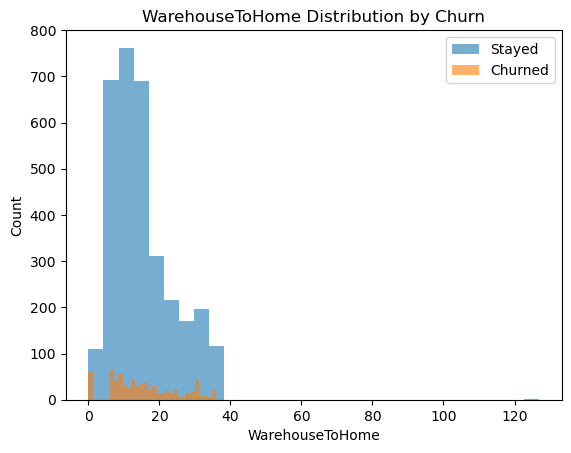

In [17]:
import matplotlib.pyplot as plt 

plt.hist(df[df["Churn"] == 0]
["WarehouseToHome"], bins = 30, alpha = 0.6, label = "Stayed")
plt.hist(df[df["Churn"] == 1] 
["WarehouseToHome"], bins = 30, alpha = 0.6, label = "Churned")

plt.xlabel("WarehouseToHome")
plt.ylabel("Count")
plt.legend()
plt.title("WarehouseToHome Distribution by Churn")

plt.savefig("figures/Warehouse_distribution_by_churn.png", dpi = 300, bbox_inches = "tight")

plt.show()

#### Business Insight & Implication

#### Days since last order

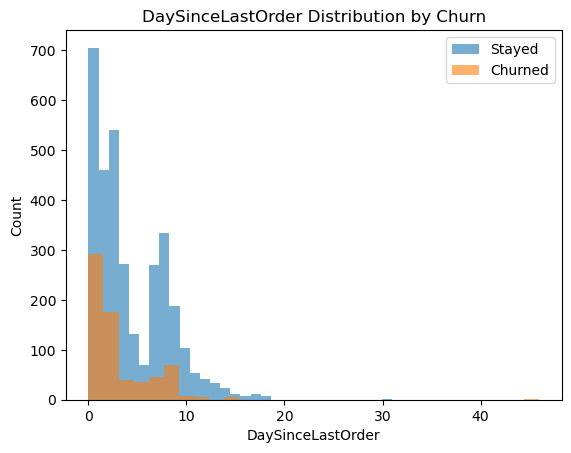

In [18]:
import matplotlib.pyplot as plt 

plt.hist(df[df["Churn"] == 0]
["DaySinceLastOrder"], bins = 30, alpha = 0.6, label = "Stayed")
plt.hist(df[df["Churn"] == 1] 
["DaySinceLastOrder"], bins = 30, alpha = 0.6, label = "Churned")

plt.xlabel("DaySinceLastOrder")
plt.ylabel("Count")
plt.legend()
plt.title("DaySinceLastOrder Distribution by Churn")

plt.savefig("figures/DaySinceLastOrder_Distribution_by_churn.png", dpi = 300, bbox_inches = "tight")

plt.show()

#### Business Interpretation

#### Satisfaction score vs Churn (categorical)

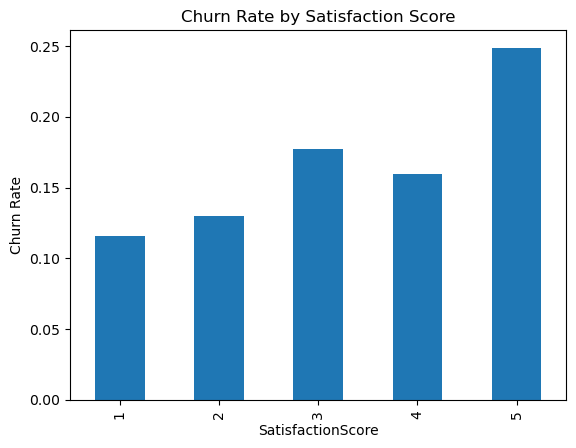

In [19]:
df.groupby("SatisfactionScore") ["Churn"].mean().plot(kind = "bar")

plt.ylabel("Churn Rate")
plt.title("Churn Rate by Satisfaction Score")

plt.savefig("figures/Churn_rate_by_Satisfaction_Score.png", dpi = 300, bbox_inches = "tight")

plt.show()

#### Business Intepretation 

#### Complaint vs Churn (binary)

In [20]:
df.groupby("Complain") ["Churn"].mean()

Complain
0    0.109264
1    0.327942
Name: Churn, dtype: float64

#### Business Interpretation

#### Step 4: Split the Dataset (Train-Test Split)

#### Step 4A: Define X and Y (conceptually)

#### Step 4B: The code

In [21]:
from sklearn.model_selection import train_test_split



X = df.drop(["Churn", "PreferedOrderCat", "MaritalStatus"], axis = 1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 42, 
    stratify = y)

# The dataset was split into training (70%) and testing(30%) sets to evaluate model performance on unseen data.

#  df.drop("Churn", axis =1) removes churn from features, prevents data leakage
#  y = df["Churn"] - This is the label the model will learn to predict
#  test_size = 0.3 - 70% for data training, 30% for testing data. This is the standard split. 
# random_state = 42- makes results reproducible, same split every time you run the notebook. 
# stratify = y -Stratified sampling was applied to preserve the original churn distrubtion, ensuring a reliable and unbiased assessment of churn 
# predicition accuracy. This ensures proportion of churners vs non-churners is the same in train and test sets, without this the test set might contain 
#- very few churners and evaluation becomes misleading.

#### Sanity check

In [22]:
print(y_train.mean())
print(y_test.mean())

# The two numbers are almost the same, meaning the split is correct.

0.17113850616388687
0.17075232459847844


#### Step 5: Train the Logistic Regression Model

#### Step 5A: Import the model

In [23]:
from sklearn.linear_model import LogisticRegression

#### Step 5B: Create the model object

In [24]:
log_model = LogisticRegression( max_iter = 2000, solver = "liblinear")
model = LogisticRegression(max_iter = 2000) 
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


#### Step 5C: Train (fit) the model

In [25]:
log_model.fit(X_train, y_train)

# This is the learning step
# The model finds coefficients (weights)
# Each feature gets a positive or negative influence on churn

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,2000
,multi_class,'deprecated'


#### Check if the training actually worked

In [26]:
log_model.coef_

array([[-2.14938423e-01,  3.14463681e-03,  2.52982536e-01,
         1.97911881e-01,  1.46467737e-01,  1.48372528e+00,
        -9.35931701e-02, -1.18566245e-03, -5.08656497e-05]])

#### Step 6 : Make Predictions Using the Model

In [27]:
# Predic churn class (0 or 1)

y_pred = log_model.predict(X_test)

# This uses the trained model, looks at X_test (customers it has never seen before)
# Outputs: 0 = predicted to stay: 1 = predicted to churn

#### Predict churn probabilty 

In [28]:
y_pred_proba = log_model.predict_proba(X_test)

# This gives two probabilties per customer: Column 0 = probabilty of not churning, Column 1 = probability of churning
# You are simply trying to find customers who are more likely to leave and rank them

In [29]:
y_pred_proba[:5]

array([[0.93520768, 0.06479232],
       [0.99816384, 0.00183616],
       [0.98542465, 0.01457535],
       [0.59214522, 0.40785478],
       [0.59398607, 0.40601393]])

### Predict Churn Probabilty

In [30]:
df["Churn_probabilty"] = model.predict_proba(X)[:, 1]

#### Rank Customers

In [31]:
df.sort_values("Churn_probabilty", ascending = False)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,Customer_ID,Churn_probabilty
1581,0.0,10.0,3,Mobile,2,Single,19,1,0.0,122.85,1,1582,9.431909e-01
859,1.0,30.0,4,Fashion,5,Married,11,1,0.0,224.50,1,860,9.355886e-01
3167,1.0,30.0,4,Fashion,5,Married,11,1,0.0,224.50,1,3168,9.328170e-01
1941,1.0,9.0,5,Laptop & Accessory,4,Single,9,1,0.0,224.07,1,1942,9.089931e-01
487,1.0,17.0,5,Mobile Phone,5,Single,8,1,1.0,149.04,1,488,9.046302e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,30.0,7.0,1,Laptop & Accessory,3,Married,1,0,8.0,149.00,0,2687,7.349005e-05
51,61.0,28.0,4,Grocery,1,Married,6,1,1.0,303.75,0,52,3.535930e-06
1209,60.0,27.0,3,Grocery,1,Married,5,1,0.0,278.75,0,1210,2.827474e-06
449,51.0,7.0,2,Laptop & Accessory,3,Divorced,2,0,9.0,174.00,0,450,1.033420e-06


#### Reorder columns to put customer_id first

In [32]:
df_sorted = df.sort_values("Churn_probabilty", ascending = False)
cols = ["Customer_ID"] + [col for col in df_sorted.columns if col != "Customer_ID"]
df_sorted = df_sorted[cols] 


# Display
df_sorted.head()


,Customer_ID,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,Churn_probabilty
1581,1582,0.0,10.0,3,Mobile,2,Single,19,1,0.0,122.85,1,0.943191
859,860,1.0,30.0,4,Fashion,5,Married,11,1,0.0,224.50,1,0.935589
3167,3168,1.0,30.0,4,Fashion,5,Married,11,1,0.0,224.50,1,0.932817
1941,1942,1.0,9.0,5,Laptop & Accessory,4,Single,9,1,0.0,224.07,1,0.908993
487,488,1.0,17.0,5,Mobile Phone,5,Single,8,1,1.0,149.04,1,0.904630


#### BUSINESS INTERPRETATION

#### Step 7: Display the Confusion Matrix

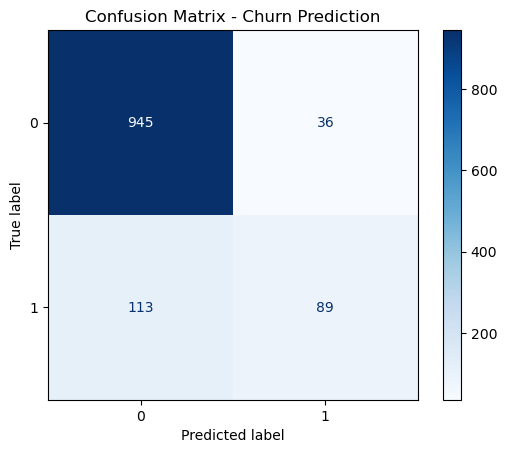

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
y_pred = log_model.predict(X_test)

#  Generate the  confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log_model.classes_)
disp.plot(cmap = "Blues") 
plt.title("Confusion Matrix - Churn Prediction")

plt.savefig("figures/Confusion_Matrix-Churn_Prediction.png", dpi = 300, bbox_inches = "tight")

plt.show()
        


#### Confusion Matrix Interpretation 

* The confusion matrix compares the model's predictions with what actually happened for customer churn:
  
  - True Negatives (TN = 945): These are customers the model predicted would not churn, and they indeed did not churn.
    (The model correctly identfied a large group of loyal customers).
    
  - False Positives (FP = 36): These are customers the model predicted would churn, but they actually did not churn
    (Interpretation: The model slightly overestimated churn for some customers).
 
    
 - False Negatives (FN = 113): These are customers the model predicted would not churn, but they actually did churn.
   (Interpretation: The model slightly overestimated churn for some customers).
   
 - True Positives (TP = 89): These are customers the model predicted would churn, and they indeed did churn.
    (The model correctly identified customers at risk of leaving, which is critical of retention strategies).

* OVERALL INSIGHT:
  The model does a good job identifying loyal customers and customers at risk of leaving.
  The business can use this to focus retention efforts on high-risk customers while keeping loyal customers happy.

## Chart Visualizations

#### Chart 1: Churn Distribution

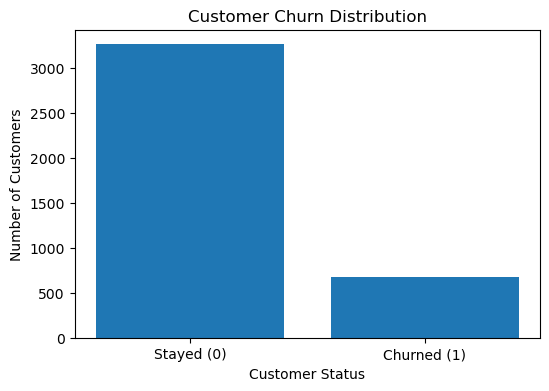

In [39]:
# Goal: To show how many customers churned vs stayed

import matplotlib.pyplot as plt

# Count churn values
Churn_counts = df["Churn"].value_counts().sort_index()

# Plot
plt.figure(figsize=(6,4))
plt.bar(Churn_counts.index, Churn_counts.values)
plt.xticks([0,1], ["Stayed (0)", "Churned (1)"])
plt.xlabel("Customer Status")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Distribution")

plt.savefig("figures/Churn_distribution.png", dpi = 300, bbox_inches = "tight")


plt.show()

#### Chart 2: Tenure Distribution by Churn Status

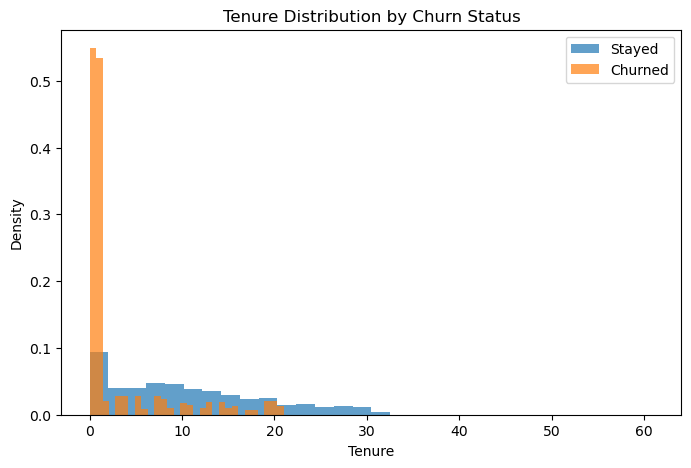

In [35]:
import matplotlib.pyplot as plt 

# Separate churned and non-churned customers 
Tenure_stayed = df[df["Churn"] ==0] ["Tenure"]
Tenure_churned = df[df["Churn"] ==1] ["Tenure"]

# Plot
plt.figure(figsize=(8,5))
plt.hist(Tenure_stayed, bins=30, alpha=0.7, label= "Stayed", density = True)
plt.hist(Tenure_churned, bins=30, alpha=0.7, label= "Churned", density = True)

plt.xlabel("Tenure")
plt.ylabel("Density")
plt.title("Tenure Distribution by Churn Status")
plt.legend()

plt.savefig("figures/Confusion_Matrix-Churn_Prediction.png", dpi = 300, bbox_inches = "tight")

plt.show()

#### Chart 4: Churn Probability Distribution

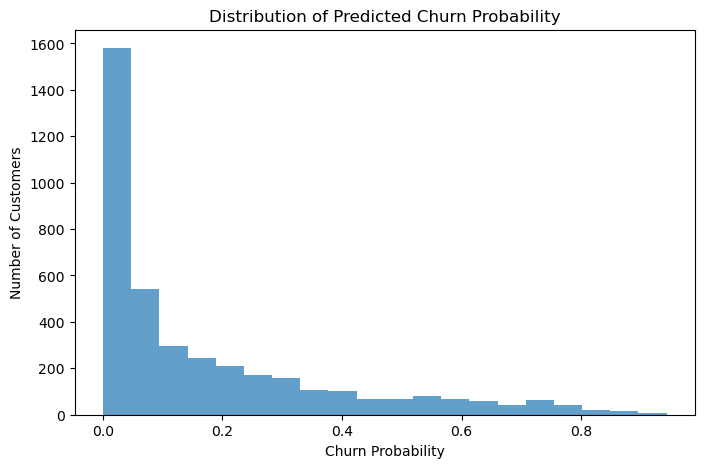

In [40]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,5))

plt.hist(df["Churn_probabilty"], bins = 20, alpha = 0.7)
plt.xlabel("Churn Probability")
plt.ylabel("Number of Customers")
plt.title("Distribution of Predicted Churn Probability") 

plt.savefig("figures/Distribution of Predicted Churn Probabilty.png", dpi = 300, bbox_inches = "tight")

plt.show()


#### Chart 5: Complaint vs Churn 

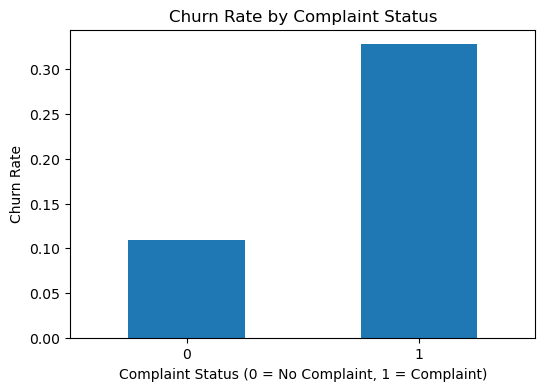

In [42]:
import matplotlib.pyplot as plt

Complaint_churn_rate = df.groupby ("Complain") ["Churn"].mean()

plt.figure(figsize=(6,4))
Complaint_churn_rate.plot(kind="bar")
plt.xlabel("Complaint Status (0 = No Complaint, 1 = Complaint)")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Complaint Status")
plt.xticks(rotation=0)

plt.savefig("figures/Churn Rate by Complaint Status.png", dpi = 300, bbox_inches = "tight")

plt.show()

### BUSINESS RECOMMNEDATIONS (Based on Churn Analysis)